# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [4]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('MEDV', axis=1)

y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42) ---> Lathos sira kai vgenoun lathos apotelesmata

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [8]:
from sklearn.linear_model import LinearRegression

# Initialise model
lr_model = LinearRegression()

# Train model on the training data
lr_model.fit(X_train, y_train)

# Predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

print("Train predictions:", y_train_pred[:5])
print("Test predictions:", y_test_pred[:5])

Train predictions: [10.96952405 19.41196567 23.06419602 12.1470648  18.3738116 ]
Test predictions: [28.99672362 36.02556534 14.81694405 25.03197915 18.76987992]


## 3. Calculate and print R-squared for both the training and the testing set.

In [10]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_train_pred)
print("R-squared for training set: %.2f" % r2_train)

r2_test = r2_score(y_test, y_test_pred)
print("R-squared for testing set: %.2f" % r2_test)

R-squared for training set: 0.75
R-squared for testing set: 0.67


- Training set R² = 0.75 → Your model explains 75% of the variance in the training data. Pretty good.
- Testing set R² = 0.67 → On unseen data, the model explains 67% of the variance. Slightly lower, but still decent.

✅ This tells you the model is generalizing fairly well - not perfect, but it’s capturing most of the patterns.

By Sofia

## 4. Calculate and print mean squared error for both the training and the testing set.

In [11]:
import numpy as np

mse_train = np.mean((y_train_pred - y_train) ** 2)
print("Mean Squared Error for training set: %.2f" % mse_train)

mse_test = np.mean((y_test_pred - y_test) ** 2)
print("Mean Squared Error for testing set: %.2f" % mse_test)

Mean Squared Error for training set: 21.64
Mean Squared Error for testing set: 24.29


#### Interpretation:

- Training MSE = 21.64 → on average, the squared error between predicted and actual house prices in the training set is 21.64 (thousand dollars²).

- Testing MSE = 24.29 → on average, the squared error on the unseen test data is slightly higher, 24.29.

✅ This is normal: errors on unseen data are usually a bit larger than on training data.

The model seems to be reasonably good because the MSE is not extremely high, and your R² values were 0.75 (train) and 0.67 (test).

By Sofia

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [13]:
mae_train = np.mean(np.abs(y_train_pred - y_train))
print("Mean Absolute Error for training set: %.2f" % mae_train)

mae_test = np.mean(np.abs(y_test_pred - y_test))
print("Mean Absolute Error for testing set: %.2f" % mae_test)

Mean Absolute Error for training set: 3.31
Mean Absolute Error for testing set: 3.19


## Classification Model Evaluation

In [23]:
from sklearn.datasets import load_iris
data = load_iris()

In [ ]:
print(data.DESCR)
# print(data.keys()) # dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

# print(data.data[:5])
# print(data.feature_names) # ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# print(data.target[:10])
# print(data.target_names) # ['setosa' 'versicolor' 'virginica']


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0]
['setosa' 'versicolor' 'virginica']


| Example            | What you have  (data)                     | What you want to predict   (Target y)            |
| ------------------ | ----------------------------------- | ------------------------------------------- |
| 🏠 Housing dataset | number of rooms, tax rate, distance | house price (`MEDV`)                        |
| 🌸 Iris dataset    | petal length, sepal width, etc.     | species (`setosa`/`versicolor`/`virginica`) |
| 💊 Drug dataset    | age, sex, cholesterol               | which drug works best                       |

By Sofia

In [ ]:
column_names = data.feature_names
# Column names are set using data.feature_names.

In [ ]:
df = pd.DataFrame(data['data'],columns=column_names)

# data['data'] contains all the feature values (numeric values for sepal/petal length/width).
# pd.DataFrame(...) converts it into a table-like DataFrame.

In [20]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [37]:
target = pd.DataFrame(data.target)
# data.target contains the class labels (0 = Setosa, 1 = Versicolor, 2 = Virginica).

In [38]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [39]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [40]:
from sklearn.model_selection import train_test_split

X = df
y = target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)  # increase iterations to ensure convergence

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Training predictions:", y_train_pred[:10])
print("Testing predictions:", y_test_pred[:10])

Training predictions: [0 0 1 0 0 2 1 0 0 0]
Testing predictions: [1 0 2 1 1 0 1 2 1 1]


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [43]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Accuracy for training set: %.2f" % train_accuracy)
print("Accuracy for testing set: %.2f" % test_accuracy)

Accuracy for training set: 0.97
Accuracy for testing set: 1.00


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [46]:
from sklearn.metrics import balanced_accuracy_score

bal_acc_train = balanced_accuracy_score(y_train, y_train_pred)
print("Balanced accuracy for training set: %.2f" % bal_acc_train)

bal_acc_test = balanced_accuracy_score(y_test, y_test_pred)
print("Balanced accuracy for testing set: %.2f" % bal_acc_test)


Balanced accuracy for training set: 0.98
Balanced accuracy for testing set: 1.00


## 10. Calculate and print the precision score for both the training and the testing set.

In [44]:
from sklearn.metrics import precision_score

precision_train = precision_score(y_train, y_train_pred, average='macro')
print("Precision for training set: %.2f" % precision_train)

precision_test = precision_score(y_test, y_test_pred, average='macro')
print("Precision for testing set: %.2f" % precision_test)

Precision for training set: 0.98
Precision for testing set: 1.00


## 11. Calculate and print the recall score for both the training and the testing set.

In [45]:
from sklearn.metrics import recall_score

recall_train = recall_score(y_train, y_train_pred, average='macro')
print("Recall for training set: %.2f" % recall_train)

recall_test = recall_score(y_test, y_test_pred, average='macro')
print("Recall for testing set: %.2f" % recall_test)


Recall for training set: 0.98
Recall for testing set: 1.00


## 12. Calculate and print the F1 score for both the training and the testing set.

Since this is a multiclass problem (3 types of Iris flowers), you should use the `average='weighted'` parameter to account for class imbalance.

By Sofia

In [ ]:
from sklearn.metrics import f1_score

f1_train = f1_score(y_train, y_train_pred, average='weighted')
print("F1 score for training set: %.2f" % f1_train)

f1_test = f1_score(y_test, y_test_pred, average='weighted')
print("F1 score for testing set: %.2f" % f1_test)


F1 score for training set: 0.97
F1 score for testing set: 1.00


## 13. Generate confusion matrices for both the training and the testing set.

In [48]:
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(y_train, y_train_pred)
print("Confusion matrix for training set:\n", cm_train)

cm_test = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix for testing set:\n", cm_test)


Confusion matrix for training set:
 [[40  0  0]
 [ 0 38  3]
 [ 0  0 39]]
Confusion matrix for testing set:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


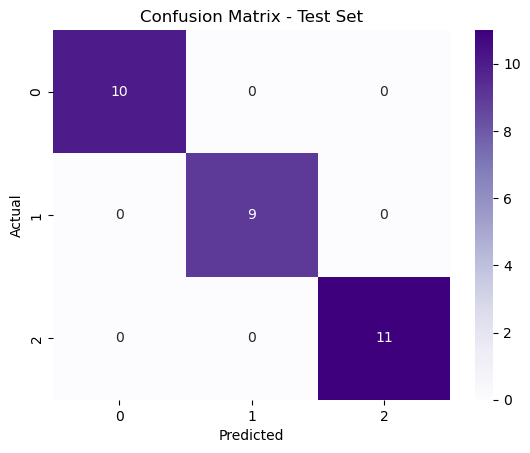

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')
plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

#### 1. For the regression datasets (Fuel Consumption, Housing):

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_test_pred_rf = rf_model.predict(X_test)
y_train_pred_rf = rf_model.predict(X_train)

print("R2 Test:", r2_score(y_test, y_test_pred_rf))
print("R2 Train:", r2_score(y_train, y_train_pred_rf))
print("MSE Test:", mean_squared_error(y_test, y_test_pred_rf))


R2 Test: 0.9980206677265501
R2 Test: 0.9905091254351724
MSE Test: 0.0013833333333333336


In [62]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

knn = KNeighborsRegressor(n_neighbors=5)  # 5 nearest neighbors
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print("R2 Train:", r2_score(y_train, y_train_pred))
print("R2 Test:", r2_score(y_test, y_test_pred))

mse_test = np.mean((y_test_pred - y_test) ** 2)
print("MSE Test:", mse_test)


R2 Train: 0.9635404578542041
R2 Test: 0.9885532591414944
MSE Test: 0.007999999999999997


#### 2. For classification datasets (Drug, Iris):

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_test_pred_rf = rf_clf.predict(X_test)
y_train_pred_rf = rf_clf.predict(X_train)

print("Accuracy Test:", accuracy_score(y_test, y_test_pred_rf))
print("Confusion Matrix Test:\n", confusion_matrix(y_test, y_test_pred_rf))


Accuracy Test: 1.0
Confusion Matrix Test:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
